In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Convolution Sum of Discrete-Time Signal
- x[n], h[n], y[n]을 표현하기 위한 index n을 정의
- h[n-k]를 표현하기 위한 함수를 정의
- n의 값을 바꾸어 가며 h[n-k]와 x[k]의 관계를 시각적으로 확인하고,
- y[n] = x[n]*h[n]을 출력해봅니다.

In [2]:
# -N부터 N까지의 index로 signal을 표현하기 위해 index vector n을 정의
N = 50
n = np.arange(-N,N+1)
print(n)

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]


In [7]:
# h[n]으로 부터 임의의 n에 대해 k를 변수로 가지는 h[n-k]를 만들어주는 함수를 정의
def h_s(h,n0):
    padv = len(h)
    h_p = np.pad(h,padv)
    h_p = h_p[::-1]
    return h_p[padv-n0:-padv-n0]

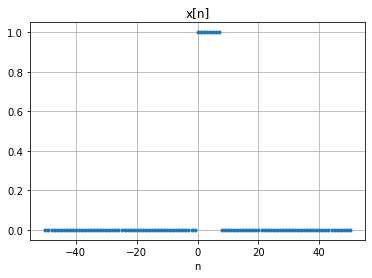

In [8]:
# 입력신호 x[n]을 자유롭게 정의해보기

#x = np.amax((10-np.abs(n),np.zeros(n.shape)),axis=0)/10.
x = np.zeros(n.shape)
x[n>=0]=1
x[n>=8]=0
plt.plot(n,x,'.')
plt.grid('on')
plt.xlabel('n')
plt.title('x[n]')
plt.show()

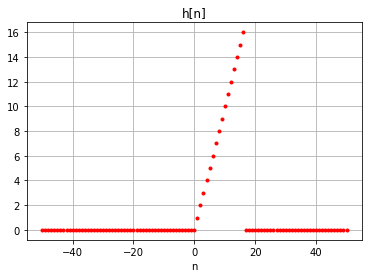

In [9]:
# impulse response h[n]을 자유롭게 정의해보기

#h = np.amax((10-np.abs(n),np.zeros(n.shape)),axis=0)>0.

h = n.copy()
h[n>16]=0
h[n<=0]=0

plt.plot(n,h,'r.')
plt.grid('on')
plt.xlabel('n')
plt.title('h[n]')
plt.show()

n = 5:


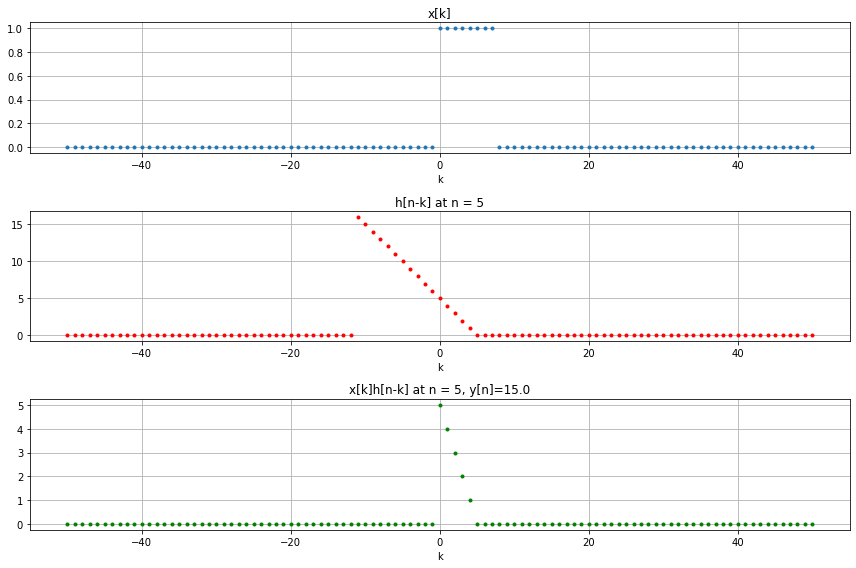

In [10]:
# n(N)의 값을 바꾸어가며 x[k]와 h[n-k]의 관계를 시각적으로 확인해보고, y[n]의 의미를 이해합니다.

N=5
print(f'n = {N}:')

plt.figure(figsize=(12,8))

plt.subplot(311)
plt.plot(n,x,'.')
plt.title('x[k]')
plt.xlabel('k')
plt.grid('on')


plt.subplot(312)
plt.plot(n,h_s(h,N),'r.')
plt.title(f'h[n-k] at n = {N}')
plt.xlabel('k')
plt.grid('on')

plt.subplot(313)
plt.plot(n,x*h_s(h,N),'g.')
plt.title(f'x[k]h[n-k] at n = {N}, y[n]={np.sum(x*h_s(h,N))}')
plt.xlabel('k')
plt.grid('on')

plt.tight_layout()
plt.show()


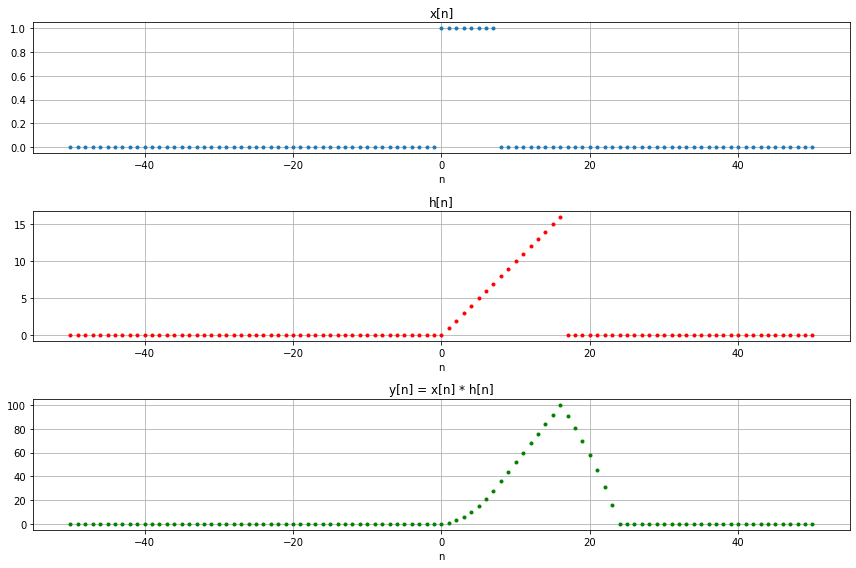

In [11]:
# 전체 구간에 대해 y[n]을 계산하여, x[n]*h[n]의 결과를 시각적으로 이해합니다.

y = np.zeros(x.shape)
for i,N in enumerate(n):
    y[i]=np.sum(x*h_s(h,N))

plt.figure(figsize=(12,8))

plt.subplot(311)
plt.plot(n,x,'.')
plt.title('x[n]')
plt.xlabel('n')
plt.grid('on')

plt.subplot(312)
plt.plot(n,h,'r.')
plt.title('h[n]')
plt.xlabel('n')
plt.grid('on')

plt.subplot(313)
plt.plot(n,y,'g.')
plt.title(f'y[n] = x[n] * h[n]')
plt.xlabel('n')
plt.grid('on')

plt.tight_layout()
plt.show()

### Numpy.convolve
- Convolution연산은 매우 유용한 연산으로 많은 파이썬 패키지에 이미 구현이 되어 있습니.
- Numpy에서는 numpy.convolve를 불러와서 2개의 1D신호에 대한 convolution을 계산할 수 있습니다.

In [21]:
n = np.arange(-32,32+1)
x = np.zeros(n.shape)
h = np.zeros(n.shape)
x[n==10]=1
h[n==-10]=1
y = np.convolve(x,h,'same')

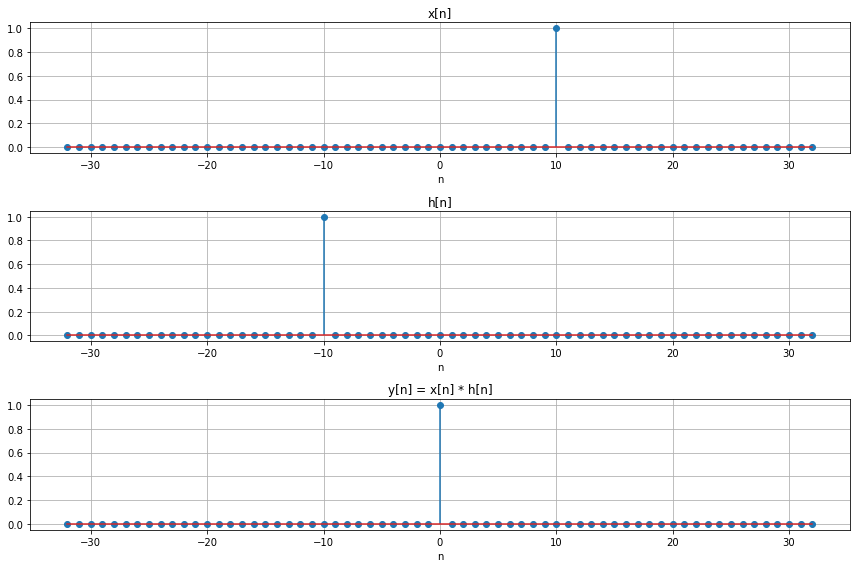

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(311)
plt.stem(n,x)
plt.title('x[n]')
plt.xlabel('n')
plt.grid('on')

plt.subplot(312)
plt.stem(n,h)
plt.title('h[n]')
plt.xlabel('n')
plt.grid('on')

plt.subplot(313)
plt.stem(n,y)
plt.title(f'y[n] = x[n] * h[n]')
plt.xlabel('n')
plt.grid('on')

plt.tight_layout()
plt.show()